## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r"G:\PYTHON JUPYTER NOTEBOOK\book price prediction\Participants_Data")
path_data = os.getcwd()

## Importing data

In [3]:
data_train=pd.read_excel("Data_Train.xlsx")

In [4]:
data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
data_train.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [6]:
data_train.shape

(6237, 9)

In [7]:
data_test=pd.read_excel("Data_Test.xlsx")

In [8]:
data_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [9]:
data_test.shape

(1560, 8)

## Data Pre-processing

In [10]:
data_train.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [11]:
price=data_train.Price

In [12]:
data_train.drop('Price',axis=1,inplace=True)

In [13]:
df=data_train.append(data_test)

In [14]:
df.shape

(7797, 8)

In [15]:
df["Edition_new"]=df.Edition.apply(lambda x: (x.split(",")[0]))

In [16]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_new
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover


## EDA

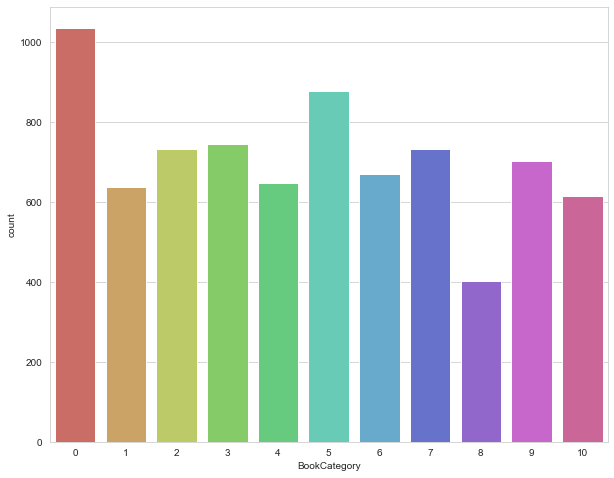

In [39]:
plt.subplots(figsize=(10,8))
sns.countplot(x ='BookCategory', data = df, palette = 'hls')

## Feature Engineering

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
df.Author=le.fit_transform(df.Author)
df.Genre=le.fit_transform(df.Genre)
df.BookCategory=le.fit_transform(df.BookCategory)
df.Edition_new=le.fit_transform(df.Edition_new)

In [26]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_new
0,The Prisoner's Gold (The Hunters 3),748,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,1,0,13
1,Guru Dutt: A Tragedy in Three Acts,370,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,78,2,13
2,Leviathan (Penguin Classics),4045,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",202,6,13
3,A Pocket Full of Rye (Miss Marple),79,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,96,5,13
4,LIFE 70 Years of Extraordinary Photography,1138,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",264,1,8


In [27]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Edition_new'],
      dtype='object')

In [28]:
df.drop('Synopsis',axis=1,inplace=True)
df.drop('Title',axis=1,inplace=True)
df.drop('Edition',axis=1,inplace=True)

In [29]:
df["Reviews"]=df.Reviews.apply(lambda x: float(x.split()[0]))

In [30]:
df["Ratings"]=df.Ratings.str.extract('(\d+)')
df["Ratings"]=df.Ratings.astype(float)

In [31]:
df.head()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_new
0,748,4.0,8.0,1,0,13
1,370,3.9,14.0,78,2,13
2,4045,4.8,6.0,202,6,13
3,79,4.1,13.0,96,5,13
4,1138,5.0,1.0,264,1,8


## Pairplots for numerical columns

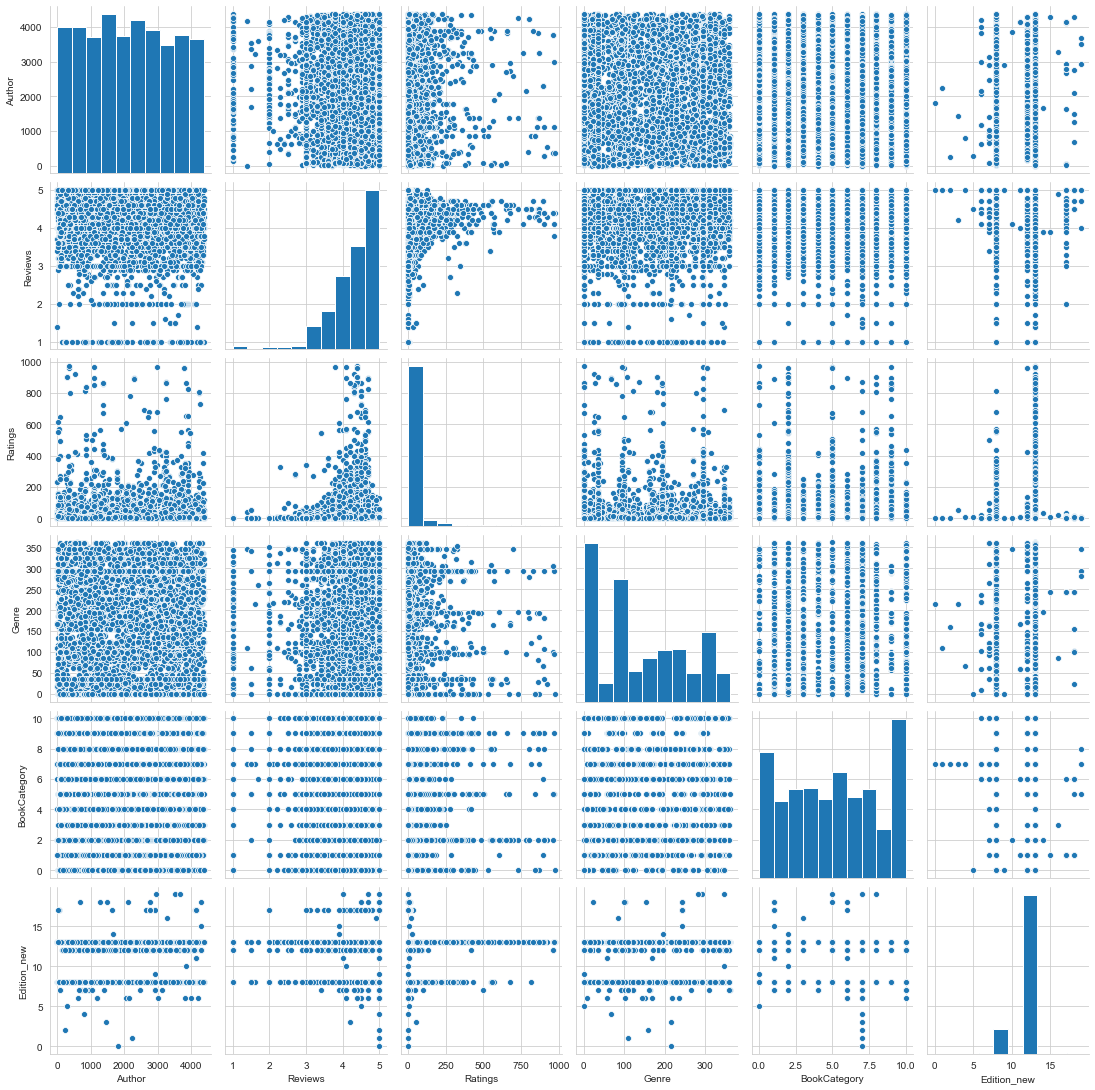

In [38]:
sns.set_style('whitegrid')
sns.pairplot(df)

In [32]:
training=df.iloc[:6237]

In [33]:
training['Price']=price

<ipython-input-33-f627ca66c634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Price']=price


In [34]:
training.head()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_new,Price
0,748,4.0,8.0,1,0,13,220.00
1,370,3.9,14.0,78,2,13,202.93
2,4045,4.8,6.0,202,6,13,299.00
3,79,4.1,13.0,96,5,13,180.00
4,1138,5.0,1.0,264,1,8,965.62


In [35]:
testing=df.iloc[6237:]

## Correlation

In [36]:
training.corr()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_new,Price
Author,1.000000,-0.015630,-0.009694,0.008073,-0.003558,0.008134,-0.002702
Reviews,-0.015630,1.000000,-0.009644,-0.000652,-0.045656,-0.052466,0.108373
Ratings,-0.009694,-0.009644,1.000000,-0.014930,-0.019665,0.032380,-0.101145
Genre,0.008073,-0.000652,-0.014930,1.000000,0.413318,0.040333,0.061085
BookCategory,-0.003558,-0.045656,-0.019665,0.413318,1.000000,0.010223,-0.011616
Edition_new,0.008134,-0.052466,0.032380,0.040333,0.010223,1.000000,-0.215129
Price,-0.002702,0.108373,-0.101145,0.061085,-0.011616,-0.215129,1.000000


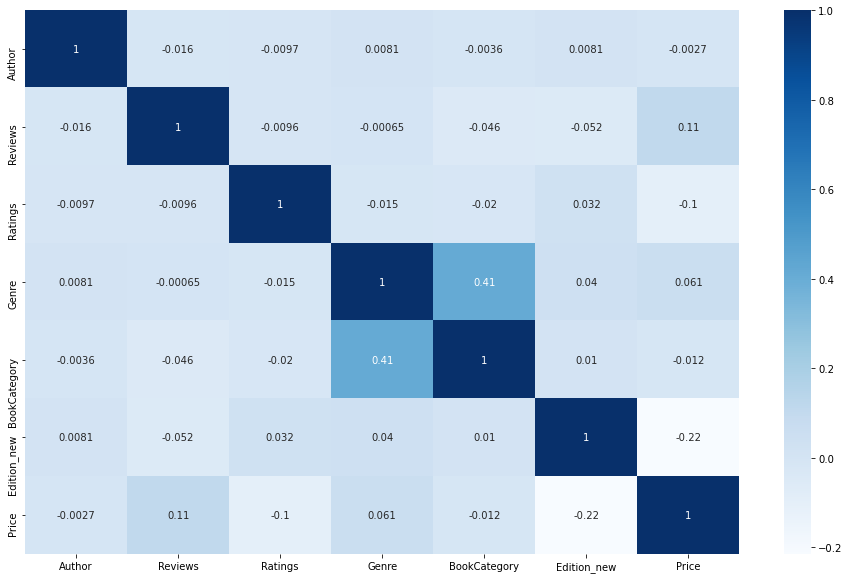

In [37]:
# Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(training.corr(),annot=True ,cmap="Blues")
plt.show()

## Creating the Independendent and Dependent Data Sets

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=training.drop('Price',axis=1)
y=training[['Price']]

## Model Building

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=101)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

## Prediction of the Model

In [45]:
prediction_lm=lm.predict(x_test)

In [46]:
prediction_lm

array([[492.18431814],
       [429.74155877],
       [488.46598619],
       ...,
       [436.01787527],
       [550.13156843],
       [477.43405201]])

## Model Evaluation

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [48]:
from sklearn.metrics import r2_score
print(mean_squared_error(y_test,prediction_lm))

275009.4174892138


In [49]:
print('RMSE_Linear Regression:', np.sqrt(mean_squared_log_error(y_test,abs(prediction_lm))))

RMSE_Linear Regression: 0.7819396881588543


## Prediction on Test Data

In [50]:
prediction_test=lm.predict(testing)

In [51]:
prediction_test

array([[-24.79876538],
       [672.34962898],
       [646.73139878],
       ...,
       [513.02026646],
       [600.18670545],
       [508.50318472]])

In [52]:
results=pd.DataFrame(data=prediction_test,columns=["Price"])

In [53]:
results

,Price
0,-24.798765
1,672.349629
2,646.731399
3,590.276132
4,558.460260
...,...
1555,578.579635
1556,438.106889
1557,513.020266
1558,600.186705


In [54]:
results.to_csv("Book_Price.csv",index=False)